**XOR Problem**

In [ ]:
import tensorflow as tf
import numpy as np

# Define the XOR input and output data
X=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([[0],[1],[1],[0]])

# Define the deep feedforward neural network model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu',input_shape=(2,)),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#Train the model
model.fit(X,y,epochs=20000,verbose=0)

#Test the model
predictions=model.predict(X)
rounded_predictions=np.round(predictions)
print("Predictions:")
for data,prediction in zip(X,rounded_predictions):
  print(f"Input:{data} --> Prediction: {prediction}")

**Accuracy**

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2641 - accuracy: 0.9225 - val_loss: 0.1381 - val_accuracy: 0.9590
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1125 - accuracy: 0.9656 - val_loss: 0.1116 - val_accuracy: 0.9677
Epoch 3/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0769 - accuracy: 0.9762 - val_loss: 0.1126 - val_accuracy: 0.9667
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0594 - accuracy: 0.9814 - val_loss: 0.0885 - val_accuracy: 0.9743
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0442 - accuracy: 0.9857 - val_loss: 0.1046 - val_accuracy: 0.9709
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0351 - accuracy: 0.9889 - val_loss: 0.0948 - val_accuracy: 0.9751
Epoch 7/10
1500/1500 [==============================] - 7s 4ms/step 

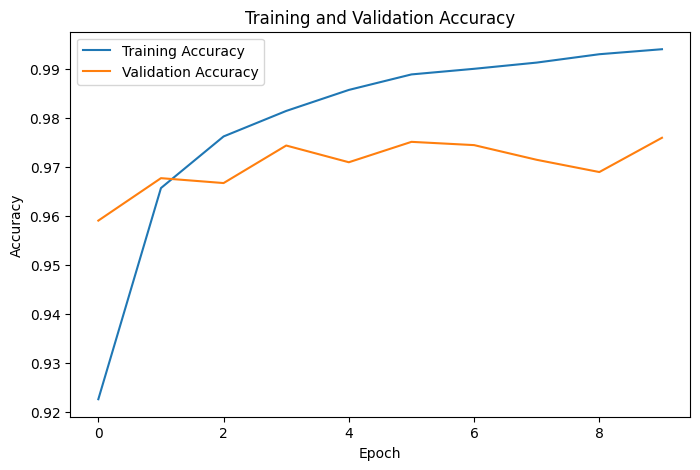

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

# Load MNIST dataset and preprocess it
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Create the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images to a 1D array
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Output layer with 10 units for 10 digits (0-9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy}")

# Plot the accuracy and loss during training
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


**Weights**

In [ ]:
import numpy as np
import tensorflow as tf

# Generate synthetic data for the perceptron training
np.random.seed(42)
num_samples = 100
input_dim = 2
output_dim = 1

# Generate random input data (2 features) and labels (0 or 1)
X = np.random.rand(num_samples, input_dim)
y = np.random.randint(2, size=(num_samples, output_dim))

# Create the perceptron model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_dim, input_dim=input_dim, activation='sigmoid')
])

# Define the fixed increment learning algorithm
def fixed_increment_learning(model, X, y, learning_rate=0.1, max_epochs=1000):
    # Convert numpy arrays to TensorFlow tensors
    X = tf.constant(X, dtype=tf.float32)
    y = tf.constant(y, dtype=tf.float32)

    # Initialize weights and biases randomly
    model.build()
    weights = model.trainable_weights[0]
    bias = model.trainable_weights[1]

    # Training loop
    for epoch in range(max_epochs):
        # Compute predictions and errors
        with tf.GradientTape() as tape:
            predictions = model(X)
            errors = y - predictions

        # Compute gradients and update weights and biases
        gradients = tape.gradient(errors, model.trainable_weights)
        weights.assign_add(learning_rate * gradients[0])
        bias.assign_add(learning_rate * gradients[1])

        # Check if weights have changed
        if tf.reduce_all(tf.math.equal(gradients[0], 0.0)) and tf.reduce_all(tf.math.equal(gradients[1], 0.0)):
            print(f"No change in weights after epoch {epoch + 1}")
            break

    return weights.numpy(), bias.numpy()

# Train the perceptron
final_weights, final_bias = fixed_increment_learning(model, X, y)

# Output the final weights and bias
print("Final weights:")
print(final_weights)
print("Final bias:")
print(final_bias)
